In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/학교 자료/기타/랩/pictures'
fstr_0 = os.path.join(path,'robot_arm0.jpg')
fstr_1 = os.path.join(path,'robot_arm1.jpg')

img_0 = cv2.imread(fstr_0, cv2.IMREAD_GRAYSCALE)
img_1 = cv2.imread(fstr_1, cv2.IMREAD_GRAYSCALE)
img_0_color = cv2.imread(fstr_0)
img_1_color = cv2.imread(fstr_1)

In [21]:
cv2.absdiff?

"""
The function cv::absdiff calculates:
.   *   Absolute difference between two arrays when they have the same
.       size and type:
"""

'\nThe function cv::absdiff calculates:\n.   *   Absolute difference between two arrays when they have the same\n.       size and type:\n'

In [22]:
diff = cv2.absdiff(img_0, img_1)
diff

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

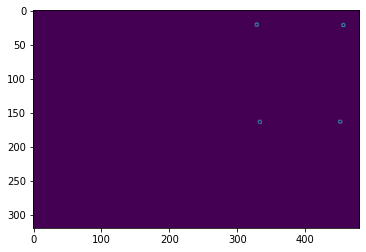

In [23]:
plt.imshow(diff)

In [24]:
diff[diff>=10] = 255
print(diff.dtype)
print(diff)
print(diff.shape)

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(320, 480)


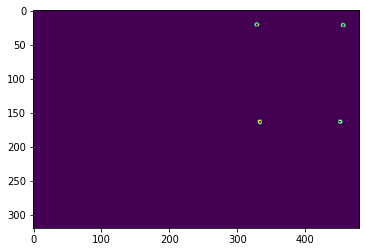

In [25]:
plt.imshow(diff)

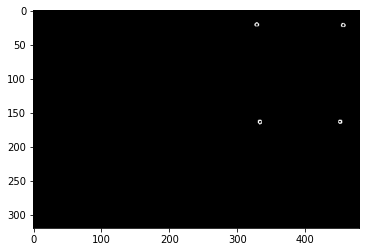

In [26]:
diff_red = cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)
plt.imshow(diff_red)

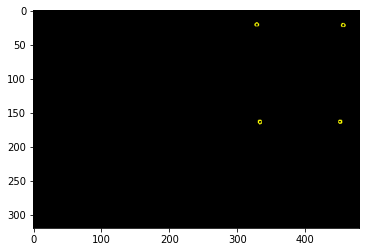

In [27]:
diff_red[:,:,2] = 0
plt.imshow(diff_red)

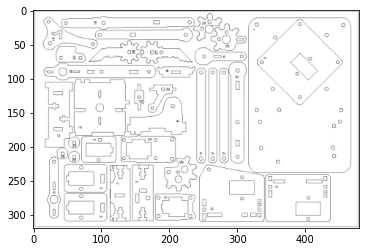

In [28]:
plt.imshow(img_1_color)

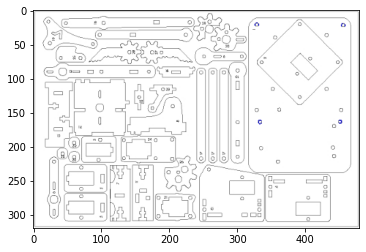

In [30]:
spot = cv2.bitwise_xor(img_1_color,diff_red)
plt.imshow(spot)

0
img_0
1
img_1
2
difference
3
spot


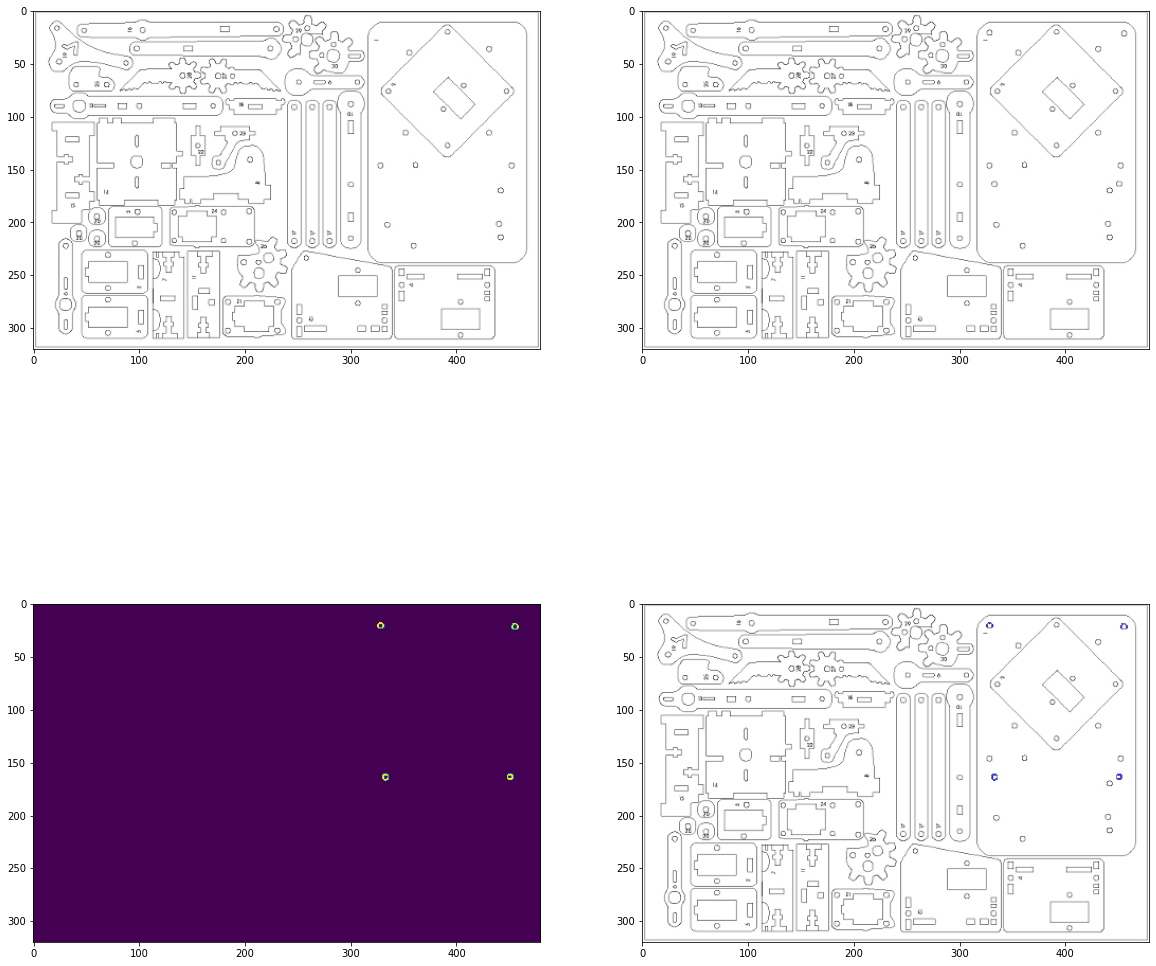

In [37]:
imgs = {'img_0':img_0_color, 'img_1':img_1_color, 'difference':diff,'spot':spot}
plt.figure(figsize = (20, 20))

for idx, (title, img) in enumerate(imgs.items()):
  print(idx)
  print(title)

  plt.subplot(2,2,idx+1)
  plt.imshow(img)

In [ ]:
plt.figure(figsize=[16,8])
for idx, (title, img) in enumerate(imgs.items()):
  plt.subplot(2,2,idx+1)
  plt.title(title)
  plt.axis('off')
  if img.ndim >2: 
    plt.imshow(img[:,:,::-1])
  else:
    plt.imshow(img,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

# ===================================

(278, 282)
(278, 282)


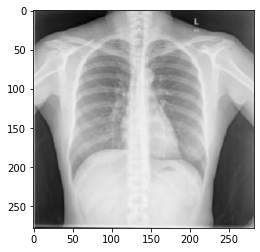

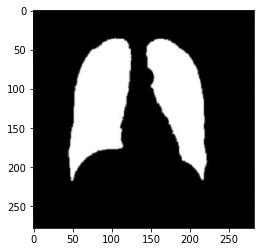

In [65]:
path_2 = '/content/drive/MyDrive/학교 자료/기타/랩/pictures'

fstr_0 = os.path.join(path,'lung.png')
fstr_1 = os.path.join(path,'lung_mask.png')
img  = cv2.imread(fstr_0,cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(fstr_1,cv2.IMREAD_GRAYSCALE) 

plt.figure()
plt.imshow(img,cmap=plt.cm.gray)
plt.figure()
plt.imshow(mask,cmap=plt.cm.gray)
print(img.shape)
print(mask.shape)

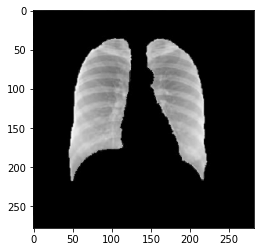

In [84]:
#_, mask = cv2.threshold(mask,254,255,cv2.THRESH_BINARY)
masked_roi = cv2.bitwise_and(img,mask)


plt.figure()
plt.imshow(masked_roi,cmap=plt.cm.gray)

In [85]:
masked_roi[masked_roi<10] = 0

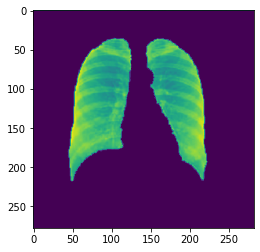

In [86]:
plt.imshow(masked_roi)

In [87]:
cv2.findContours?

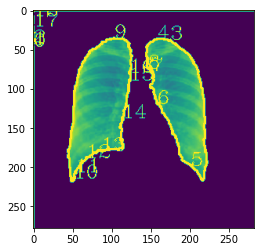

In [88]:
masked_roi_2 = masked_roi.copy()

contours, hierarchy = cv2.findContours(masked_roi_2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    cv2.drawContours(masked_roi_2, [contours[i]], 0, (255, 255, 255), 2)
    cv2.putText(masked_roi_2, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (255, 255, 255), 1)
    #print(i, hierarchy[0][i])
    plt.imshow(masked_roi_2)

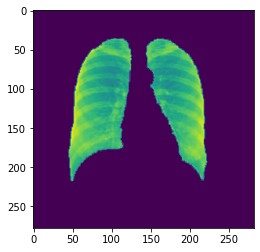

In [102]:
masked_roi_3 = masked_roi.copy()

contours, hierarchy = cv2.findContours(masked_roi_3, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in contours:
  x, y, w, h = cv2.boundingRect(masked_roi_3)
  cv2.rectangle(masked_roi_3, (x, y), (x+w, y+h), (100, 0, 100), 0)

plt.imshow(masked_roi_3)